In [1]:
import pandas as pd

#plot
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score,classification_report

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import files

uploaded = files.upload()

Saving Breast_cancer_data.csv to Breast_cancer_data.csv


In [4]:
df = pd.read_csv("Breast_cancer_data.csv")

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


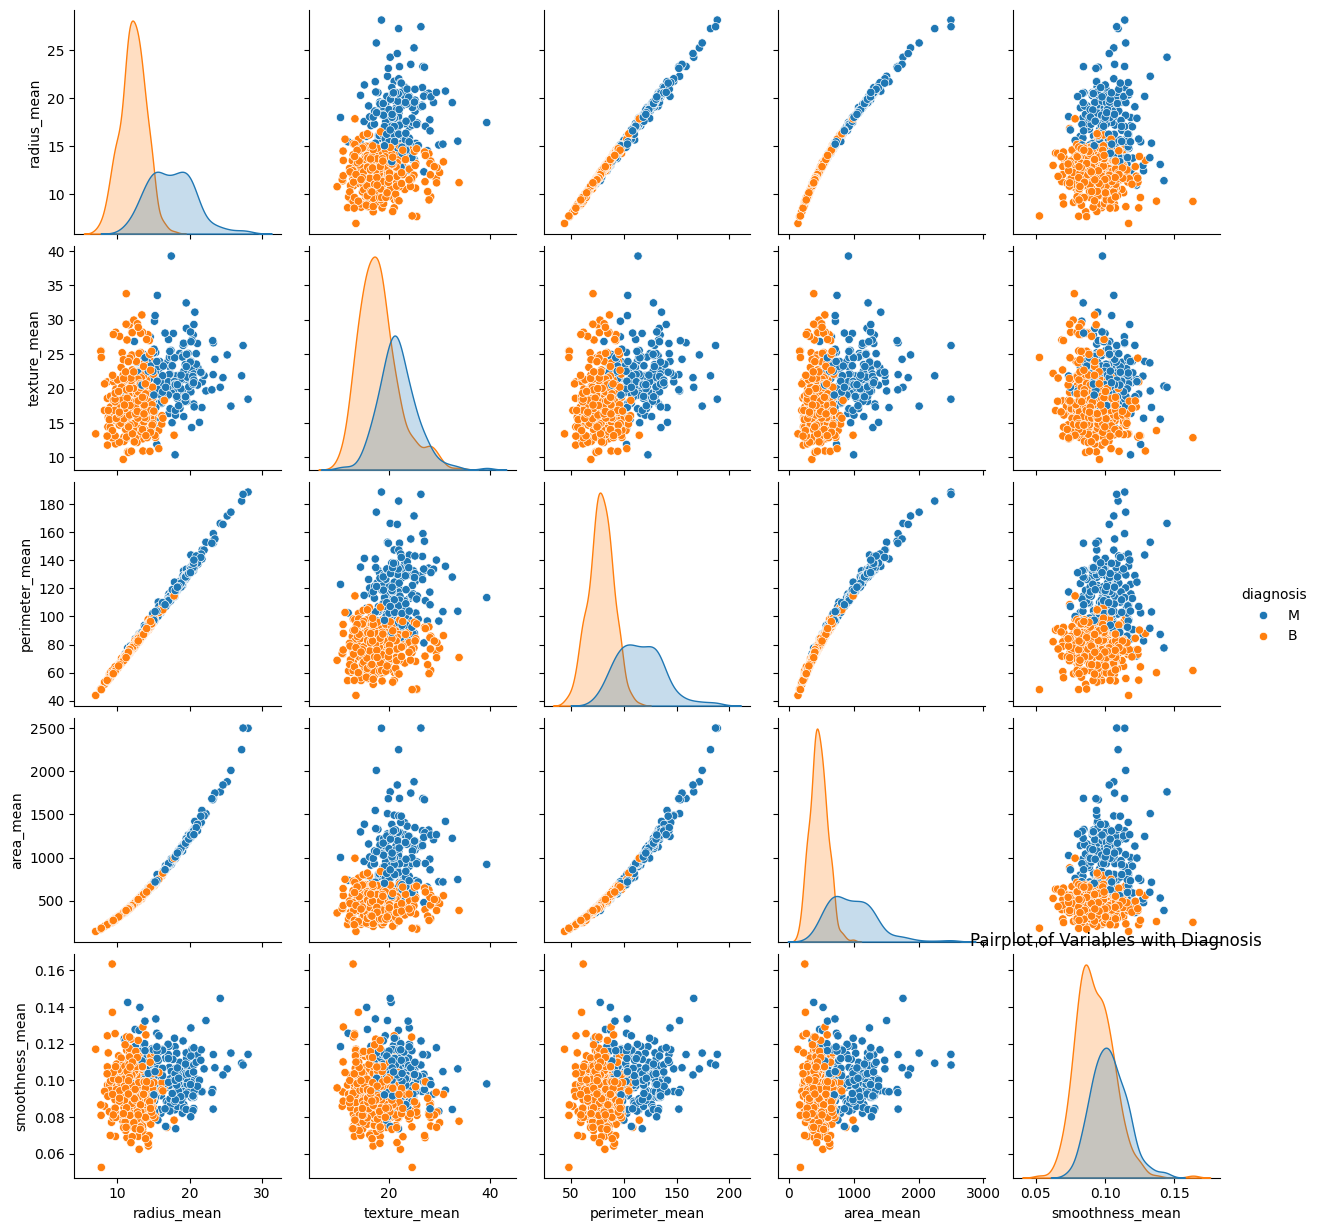

In [9]:
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])
plt.title('Pairplot of Variables with Diagnosis')
plt.show()

diagnosis
B    357
M    212
Name: count, dtype: int64


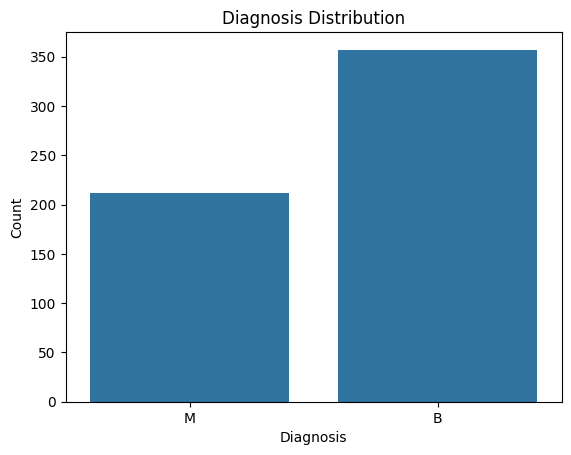

In [10]:
print(df['diagnosis'].value_counts())
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

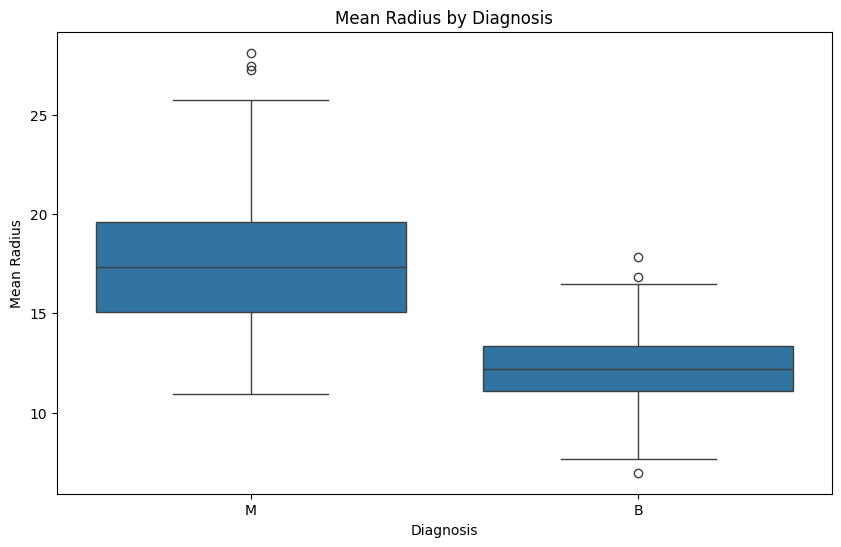

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title('Mean Radius by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Radius')
plt.show()

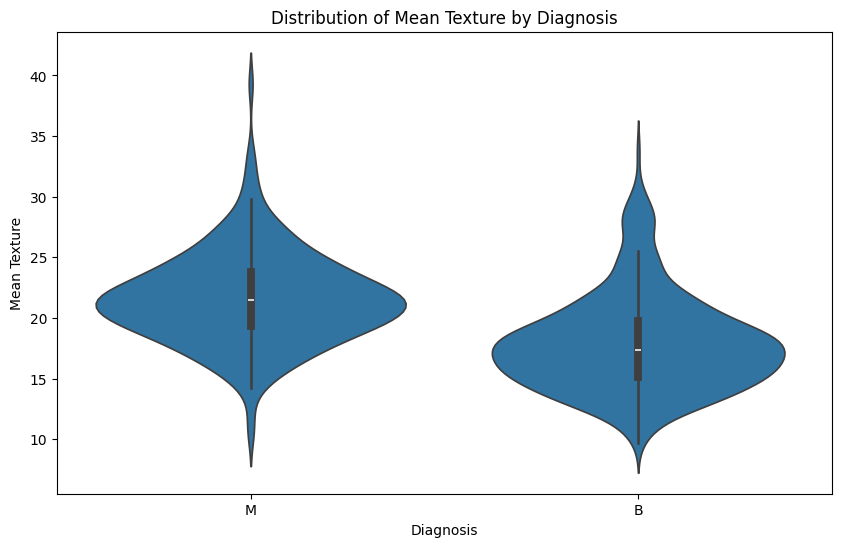

In [12]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='diagnosis', y='texture_mean', data=df)
plt.title('Distribution of Mean Texture by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Texture')
plt.show()

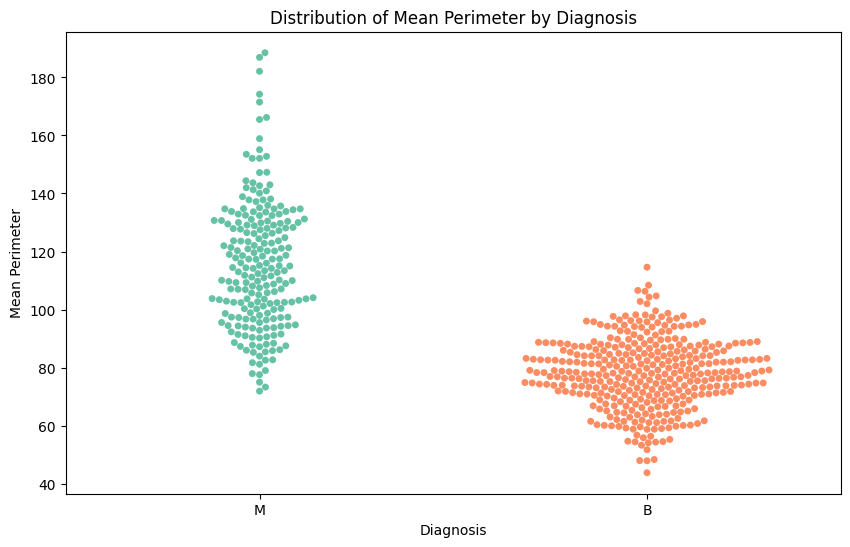

In [13]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='diagnosis', y='perimeter_mean', data=df, palette='Set2')
plt.title('Distribution of Mean Perimeter by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Perimeter')
plt.show()

In [14]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
#shape data
print(f"Shape of X: {X.shape}")

Shape of X: (569, 31)


In [15]:
print(f"Shape of y: {y.shape}")

Shape of y: (569,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()

In [18]:
X_train=scaler.fit_transform(X_train)

In [19]:
X_test=scaler.transform(X_test)

In [20]:
print("Training set shape:", X_train.shape, y_train.shape)

Training set shape: (455, 31) (455,)


In [21]:
print("Testing set shape:", X_test.shape, y_test.shape)

Testing set shape: (114, 31) (114,)


In [22]:
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [23]:
for name , model in models.items():
    scores=cross_val_score(model , X_train , y_train , cv=5)
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f} (±{scores.std():.4f})")

Random Forest Cross-Validation Accuracy: 0.9582 (±0.0108)
SVM Cross-Validation Accuracy: 0.9736 (±0.0164)
K-Nearest Neighbors Cross-Validation Accuracy: 0.9626 (±0.0226)


In [24]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.1, 0.01, 0.001, 0.0001],  # Kernel coefficient
    'kernel': ['rbf', 'linear', 'poly'],  # Kernel type
    'degree': [2, 3, 4],  # Degree of the polynomial kernel function (only applicable if kernel='poly')
    'coef0': [0.0, 0.1, 1.0],  # Independent term in the polynomial and sigmoid kernels (only applicable if kernel='poly' or 'sigmoid')
    'shrinking': [True, False],  # Whether to use the shrinking heuristic
    'probability': [True, False],  # Whether to enable probability estimates
    'tol': [1e-3, 1e-4, 1e-5],  # Tolerance for stopping criteria
    'max_iter': [-1, 1000, 2000]  # Maximum number of iterations
}

In [25]:
svm_model = SVC()

In [26]:
grid_search_svm = GridSearchCV(svm_model , param_grid=param_grid_svm,scoring='accuracy', verbose=1)
grid_search_svm.fit(X_train,y_train)

Fitting 5 folds for each of 15552 candidates, totalling 77760 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'coef0': [0.0, 0.1, 1.0],
                         'degree': [2, 3, 4],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly'],
                         'max_iter': [-1, 1000, 2000],
                         'probability': [True, False],
                         'shrinking': [True, False],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='accuracy', verbose=1)

In [27]:
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Cross-Validation Accuracy for SVM:", grid_search_svm.best_score_*100)

Best Parameters for SVM: {'C': 1, 'coef0': 1.0, 'degree': 4, 'gamma': 0.01, 'kernel': 'poly', 'max_iter': -1, 'probability': True, 'shrinking': True, 'tol': 0.001}
Best Cross-Validation Accuracy for SVM: 97.80219780219781


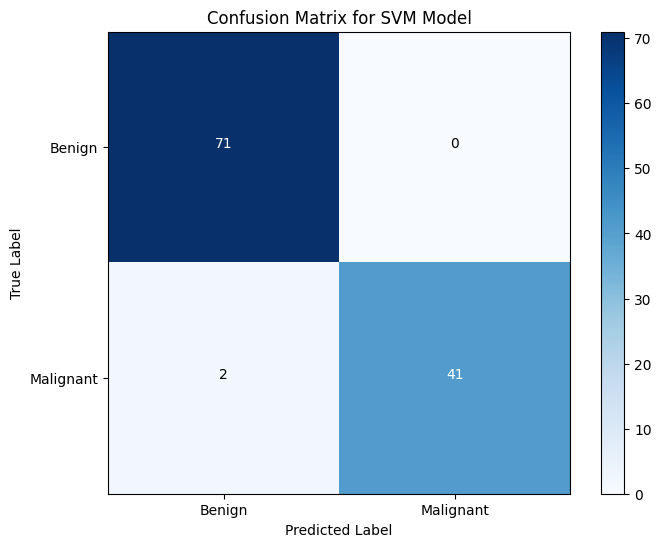

In [32]:
best_svm_model = grid_search_svm.best_estimator_

y_pred = best_svm_model.predict(X_test)


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM Model')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Benign', 'Malignant'])
plt.yticks(tick_marks, ['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.show()

In [33]:
report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])

# Print classification report
print("Classification Report for SVM Model:")
print(report)

Classification Report for SVM Model:
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        71
   Malignant       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [35]:
y_pred = gnb.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[70  1]
 [ 3 40]]
0.9649122807017544


In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
y_pred = dtc.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[68  3]
 [ 4 39]]
0.9385964912280702


In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [39]:
y_pred = rfc.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test,y_pred)*100)

[[70  1]
 [ 3 40]]
96.49122807017544


In [40]:
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [41]:
model = Sequential()

In [42]:
model.add(Dense(units = 3, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 3, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 1, activation='sigmoid'))

In [43]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [44]:
!pip install scikit-learn

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming y_train and y_test are pandas Series
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Now y_train and y_test will contain 0s and 1s instead of strings.

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.6116 - loss: 0.7556 - val_accuracy: 0.8352 - val_loss: 0.6072
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6480 - loss: 0.7171 - val_accuracy: 0.8462 - val_loss: 0.5637
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6800 - loss: 0.6913 - val_accuracy: 0.8901 - val_loss: 0.5257
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7142 - loss: 0.6225 - val_accuracy: 0.9121 - val_loss: 0.4931
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6553 - loss: 0.5947 - val_accuracy: 0.9341 - val_loss: 0.4641
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6916 - loss: 0.5767 - val_accuracy: 0.9341 - val_loss: 0.4374
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7202 - loss: 0.5373 - val_accuracy: 0.9341 - val_loss: 0.4120
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7034 - loss: 0.5643 - val_accuracy: 0.9341 - v

<Figure size 800x600 with 0 Axes>

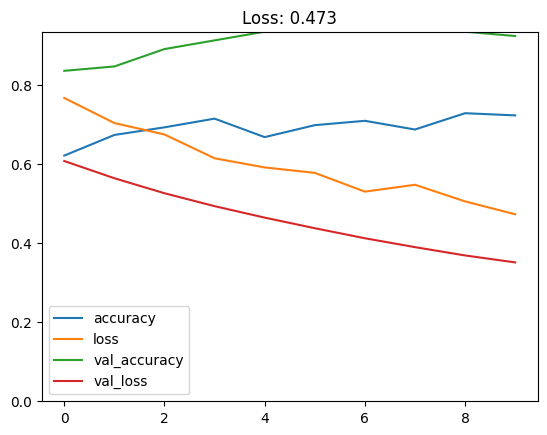

In [45]:
!pip install tensorflow
!pip install matplotlib
!pip install scikit-learn

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


# Assuming you have your model defined as 'model' and your data as X_train, y_train
# ... your model definition code from previous cells ...

# Fit the model and store the training history
deep_history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)  # Adjust epochs and batch_size as needed

def plot_loss(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])

# Now you can call plot_loss with the deep_history variable
plot_loss(deep_history)

In [48]:
y_pred_probs = model.predict(X_test)  # Get predicted probabilities

# Apply threshold to probabilities, not the original labels
y_pred_binary = (y_pred_probs > 0.5).astype(int)

y_pred_labels = label_encoder.inverse_transform(y_pred_binary.flatten())

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming 'y_pred_binary' is the binary prediction result from the model
# Keep y_pred_labels as binary to match y_test data type:
y_pred_labels = y_pred_binary.flatten()  # No inverse_transform

# Now y_pred_labels contains 0s and 1s, matching y_test
cm = confusion_matrix(y_test, y_pred_labels)
print(cm)
print(accuracy_score(y_test,y_pred_labels)*100)

[[69  2]
 [ 8 35]]
91.22807017543859


In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming model is your trained Keras model and X_test is your test data
y_pred_probs = model.predict(X_test)

# Apply threshold to probabilities, not the original labels
y_pred_binary = (y_pred_probs > 0.5).astype(int)


# Now, y_test and y_pred_binary should have the same type
cm = confusion_matrix(y_test, y_pred_binary) # Use y_pred_binary
print(cm)
print(accuracy_score(y_test, y_pred_binary)) # Use y_pred_binary

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[69  2]
 [ 8 35]]
0.9122807017543859


In [53]:
df = pd.DataFrame({
    'Model Name': ['Logistic Regression', 'K Neighbors Classifier', 'Linear SVM', 'Kernal SVM', 'Naive Bayes', 'Decision Tree Classifier', 'Random Forest Classifier', 'ANN'],
    'Accuracy Score':  [91.22, 88.59, 91.22, 89.47, 91.22, 90.35, 89.47,93.85]
})
df

,Model Name,Accuracy Score
0,Logistic Regression,91.22
1,K Neighbors Classifier,88.59
2,Linear SVM,91.22
3,Kernal SVM,89.47
4,Naive Bayes,91.22
5,Decision Tree Classifier,90.35
6,Random Forest Classifier,89.47
7,ANN,93.85


In [55]:
df = df.sort_values(by = ['Accuracy Score'], ascending=False)
df

,Model Name,Accuracy Score
7,ANN,93.85
0,Logistic Regression,91.22
2,Linear SVM,91.22
4,Naive Bayes,91.22
5,Decision Tree Classifier,90.35
3,Kernal SVM,89.47
6,Random Forest Classifier,89.47
1,K Neighbors Classifier,88.59


In [56]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.2 MB/s eta 0:00:00


In [57]:
from ipywidgets import interact

In [58]:
def handle_input(user_input):
    print("User input:",user_input)

In [59]:
interact(handle_input, user_input='https://drive.google.com/drive/folders/1trlB4ee2TaIlea_hVEtcCYiUQ3VkwfYq?usp=drive_link');

interactive(children=(Text(value='https://drive.google.com/drive/folders/1trlB4ee2TaIlea_hVEtcCYiUQ3VkwfYq?usp…

In [60]:
def get_user_input():
    # Prompt the user for input
    input_str = input("Enter the features separated by commas (e.g.,mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness): ")
    # Convert the string to a numpy array and reshape for the model
    user_features = np.array(input_str.split(','), dtype=float).reshape(1, -1)
    return user_features

# Function to make predictions with the trained model
def make_prediction(model, features):
    # Scale the features using the same scaler used during training
    scaled_features = scaler.transform(features)
    # Make a prediction
    return model.predict(scaled_features)

In [61]:
training_accuracies = []
test_accuracies = []

models = {
    'Random Forest': RandomForestClassifier(n_estimators=10, criterion='entropy'),
    'SVM': SVC(C=10, gamma=0.01, kernel='rbf'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    training_accuracies.append(model.score(X_train, y_train))
    test_accuracies.append(accuracy_score(y_test, y_pred))


overall_training_accuracy = sum(training_accuracies) / len(training_accuracies)
overall_test_accuracy = sum(test_accuracies) / len(test_accuracies)

print(f"Overall Training Accuracy: {overall_training_accuracy * 100:.2f}%")
print(f"Overall Test Accuracy: {overall_test_accuracy * 100:.2f}%")

Overall Training Accuracy: 97.98%
Overall Test Accuracy: 95.79%


In [62]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=list(models.items()), voting='hard')
ensemble_model.fit(X_train, y_train)

ensemble_predictions = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy * 100:.2f}%")

Ensemble Accuracy: 96.49%


In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def get_user_input():
    # Prompt the user to input features
    user_input = input("Enter 5 values for the features (comma-separated): ")
    # Convert the input string into a list of float values
    user_features = [float(x) for x in user_input.split(',')]
    return user_features

def make_prediction(model, user_features, scaler):
    # Scale the user input using the same scaler used for training
    scaled_features = scaler.transform([user_features])
    # Make a prediction using the trained model
    prediction = model.predict(scaled_features)
    return prediction[0]

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels

# Take only the first 5 features
X = X[:, :5]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Now you can use the get_user_input and make_prediction functions with the trained model and scaler
user_features = get_user_input()
prediction = make_prediction(model, user_features, scaler)

# Interpret the prediction
if prediction == 1:
    print("The model predicts that the person has breast cancer.")
else:
    print("The model predicts that the person does not have breast cancer.")

In [ ]:
!git clone https://github.com/Pratyush-Agarwal6/BreastCancer.git